# Seaborn
* Seaborn is a statistical plotting library
* It has beautiful default styles.
* It is designed very well to work with pandas dataframe objects.

## Importing

In [1]:
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns # Imported here, all of the above are important aswell

## Loading a dataset
* Seaborn has some inbuilt datasets of its own.
* Let's import one of them....

In [2]:
tips = sns.load_dataset('tips') # importing tips dataset

In [3]:
tips.head() # head gives us first 5 rows (we have seen it before....)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## Distribution Plots
* A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension.
* Suitable for comparing range & distributions of groups of numerical data. 

### 1. Distplot
* Seaborn distplot lets you show a histogram with a line on it.
* Shows distriution over a univariate set of observations.

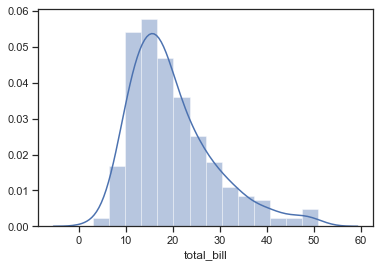

In [262]:
sns.distplot(tips['total_bill']);

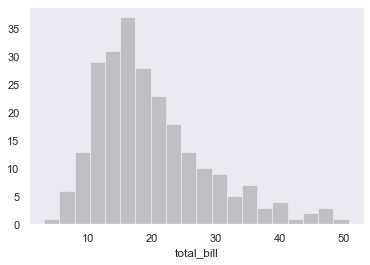

In [266]:
# removing the line, and customizing a bit..
# setting a style for fun.
sns.set(style='dark').
sns.distplot(tips['total_bill'],kde=False,bins=20,color='grey');
# see a difference? we removed the  KDE (Kernal Density Estimation)

### 2. Jointplot
* Allows you to match-up two distplots for a bivariate data, with a choice of what parameter to compare it with.

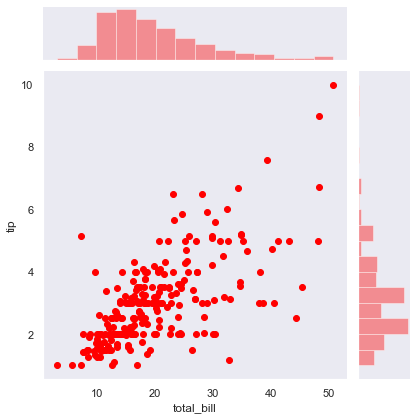

In [267]:
# By default it is a scatter plot
sns.jointplot(x='total_bill',y='tip',data=tips,color='red');

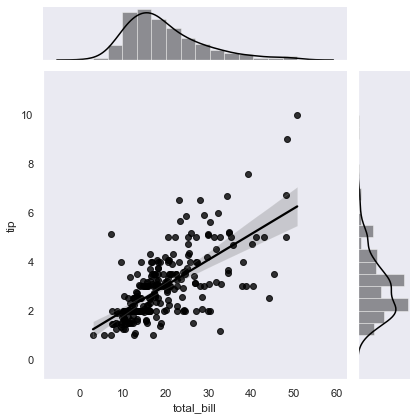

In [270]:
# We can give it a parameter 'kind',by default it's scatter...
sns.jointplot(x='total_bill',y='tip',data=tips,kind='reg',color='black');
# Linear regression (reg)

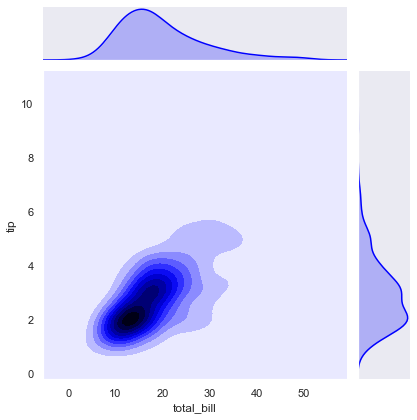

In [271]:
# one more...
sns.jointplot(x='total_bill',y='tip',data=tips,kind='kde',color='blue');
# Kernal Density Estimation (KDE)

### 3. Pairplot
* Plots pairwise relationships across an entire dataset.(For the numerical cols)

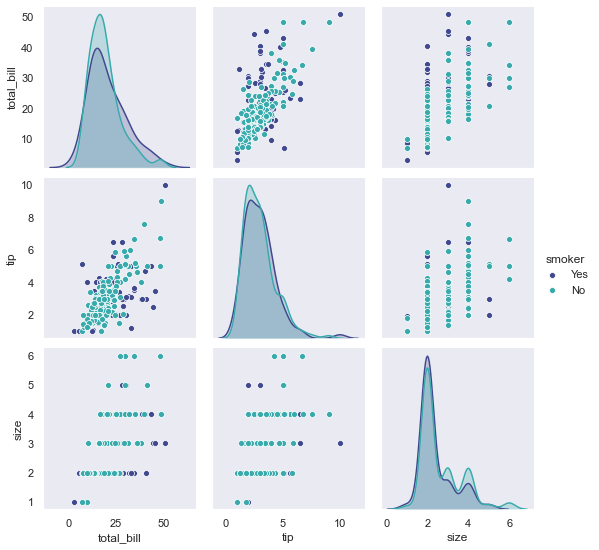

In [31]:
sns.pairplot(tips,hue='smoker',palette='mako');
# Hue: (divides the graphs into categories provided), palette: color-combination

### 4. KDE Plot
* (Kernal Density Estimation) plots, i.e shows the density

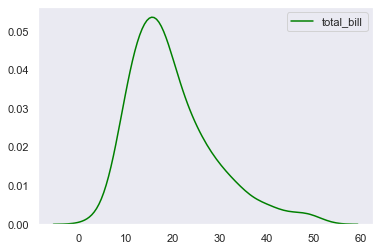

In [277]:
sns.kdeplot(tips['total_bill'],color='green');

### 5. Rugplot
* Plots marginal distributions by drawing ticks along the x and y axes.

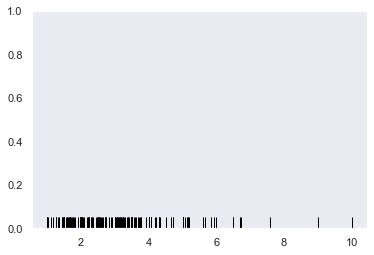

In [278]:
sns.rugplot(tips['tip'],color='black');

## Categorical Plots
A categorical plot displays a distribution of categories.

### 1. Barplot
* Shows point estimations and confidence intervals as rectangular bars.
* Allows you to aggregate he categorical data based of some function.(by default : mean)

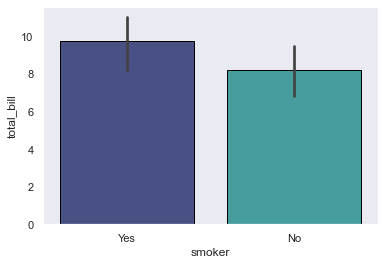

In [280]:
sns.barplot(x='smoker',y='total_bill',data=tips,palette='mako',estimator=np.std,edgecolor='black'); 
# Estimator : takes an aggregate function (by default it is 'mean')

### 2. Coutplot
* Show the counts of observations in each categorical bin using bars.
* Same as a barplot except it's estimator is explicitly counting the no. of occurence. Which is why we only provide the x value.  

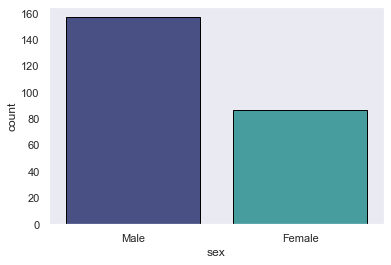

In [281]:
sns.countplot('sex',data=tips,palette='mako',edgecolor='black');

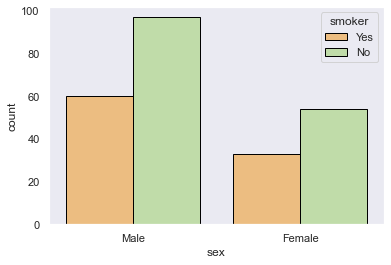

In [283]:
# Taking it a bit further
sns.countplot('sex',data=tips,hue='smoker',palette='Spectral',edgecolor='black');

### 3. Boxplot
* Draws a box plot to show distributions with respect to categories.
* Also known as 'Whisker Plot'

In [61]:
# Just checking our data once..
tips.head(2)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3


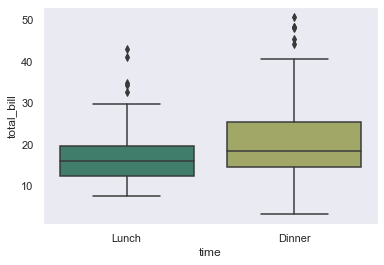

In [284]:
sns.boxplot(x='time',y='total_bill',data=tips,palette='gist_earth');

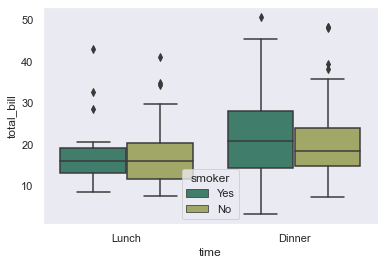

In [285]:
# advancing it a bit...
sns.boxplot(x='time',y='total_bill',data=tips,hue='smoker',palette='gist_earth');

### 4. Violinplot
* Draws a combination of boxplot and kernel density estimation.

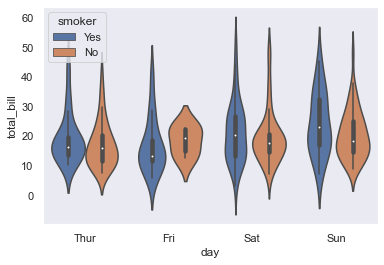

In [286]:
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker');

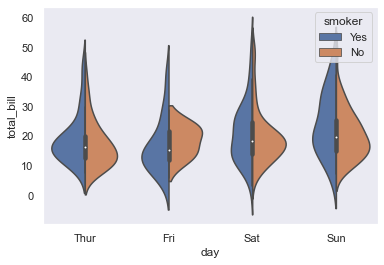

In [287]:
# Advancing it a bit...
sns.violinplot(x='day',y='total_bill',data=tips,hue='smoker',split=True);

### 5. Stripplot
* Draw a scatterplot where one variable is categorical.

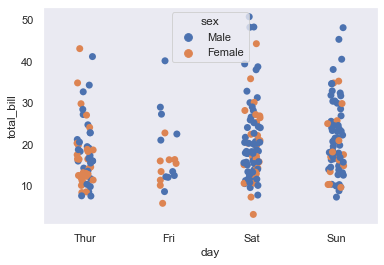

In [288]:
sns.stripplot(x='day',y='total_bill',data=tips,jitter=True,hue='sex',size=7); 
# Jitter : seperates the stacked points.

### 6. Swarmplot
* Draws a categorical scatterplot with non-overlapping points.

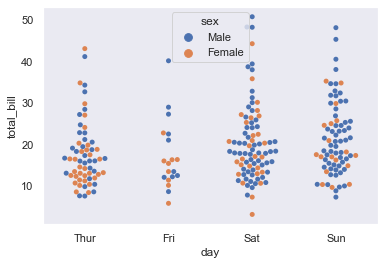

In [289]:
sns.swarmplot(x='day',y='total_bill',data=tips,hue='sex',size=5);

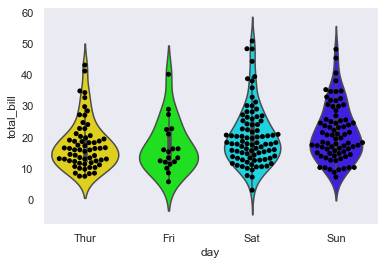

In [291]:
# Combining swarmplot & violinplot....
sns.violinplot(x='day',y='total_bill',data=tips,split=True,palette='gist_rainbow');
sns.swarmplot(x='day',y='total_bill',data=tips,size=5,color='black'); 
# looks very ugly...sorry

### 7. Factorplot
* Most general form of a categorical plot.
* It can take a 'kind' parameter to adjust the plot type.

C:\Users\prati\anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\prati\anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


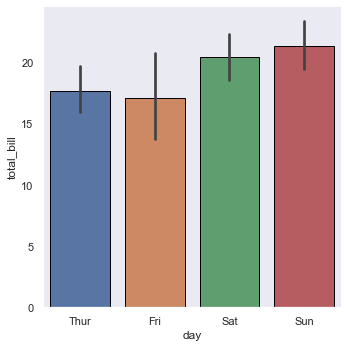

In [292]:
sns.factorplot(x='day',y='total_bill',data=tips,size=5,kind='bar',edgecolor='black');
# 'Kind' is necessary.

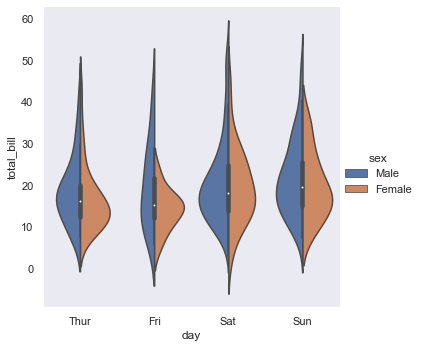

In [293]:
# Another example...
sns.factorplot(x='day',y='total_bill',data=tips,size=5,kind='violin',hue='sex',split=True);

## Matrix Plots
A matrix plot is a color-coded diagram that has rows data, columns data, and values.

We can create a matrix plot in seaborn using the heatmap() function in seaborn.

In [294]:
# We are going to use another dataset for this
flights = sns.load_dataset('flights') 
# Importing flights dataset..

In [295]:
flights.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


####  In order for a heatmap to work properly, the data should be in a matrix form i.e the index name and the column name should matchup so that the cell value shows something that is relevant to both of those names. 

#### To do that we can use either pivot table o correlation data.

In [296]:
# Doing it with the tips dataset first (using corr())
tips.corr()

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [176]:
tc = tips.corr()

### 1. Heatmap

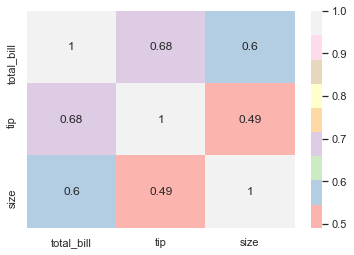

In [177]:
sns.heatmap(tc,annot=True,cmap='Pastel1'); # think of cmap as palette..., annot gives you the numeric markings...

In [180]:
# Using piot table for the flights dataset
flights.pivot_table(index='month',columns='year',values='passengers').head()

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
January,112,115,145,171,196,204,242,284,315,340,360,417
February,118,126,150,180,196,188,233,277,301,318,342,391
March,132,141,178,193,236,235,267,317,356,362,406,419
April,129,135,163,181,235,227,269,313,348,348,396,461
May,121,125,172,183,229,234,270,318,355,363,420,472


In [181]:
fp = flights.pivot_table(index='month',columns='year',values='passengers')

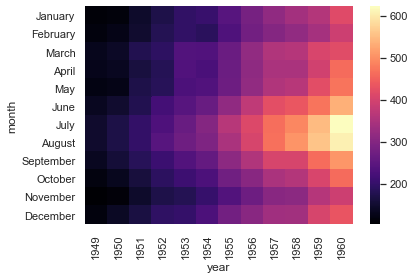

In [185]:
sns.heatmap(fp,cmap='magma');

### 2. Clustermap
* Uses hierarchial clustering to produce a clustered version of the heatmap.

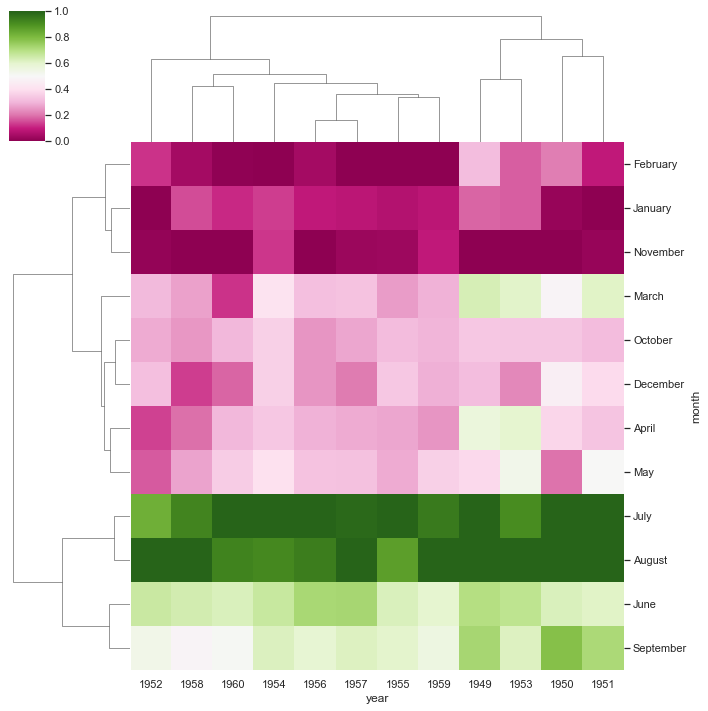

In [194]:
sns.clustermap(fp,standard_scale=1,cmap='PiYG');

## Grids
Grids are a general type of plots that allow you to map plot types to rows and columns of a grid.

#### We are going to use iris dataset for this.

In [195]:
# loading the dataset
iris = sns.load_dataset('iris')

In [196]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [198]:
iris['species'].unique().tolist()

['setosa', 'versicolor', 'virginica']

### 1. PairGrid

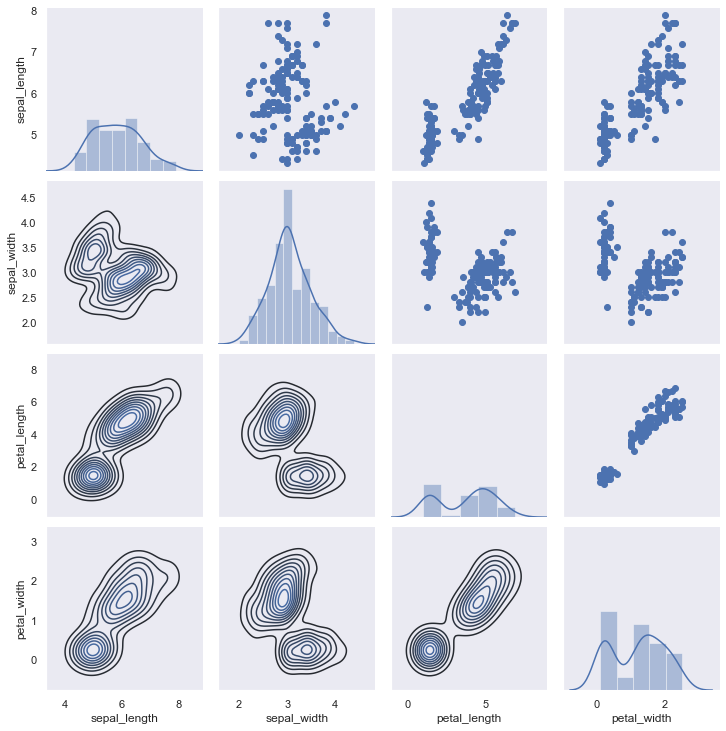

In [297]:
# Plotting a pairgrid and assigning it to a variable...
g = sns.PairGrid(iris)
# Customizinf the grids accordingly..
g.map_diag(sns.distplot) 
g.map_upper(plt.scatter)
g.map_lower(sns.kdeplot);

### 2. FacetGrid
* Creates grids of plots based of a feature.

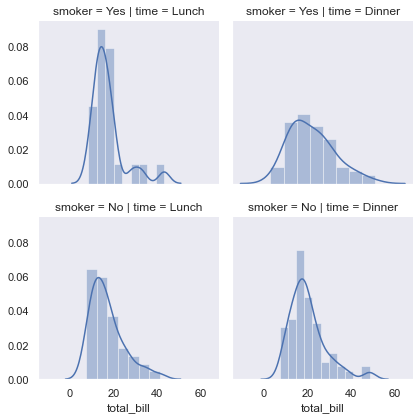

In [212]:
# Coming back to the tips dataset
g = sns.FacetGrid(data=tips,row='smoker',col='time')
g.map(sns.distplot,'total_bill');

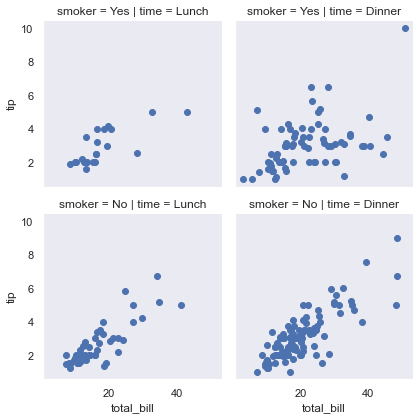

In [218]:
# Advancing it a bit...
g = sns.FacetGrid(data=tips,row='smoker',col='time')
g.map(plt.scatter,'total_bill','tip');

## Regression Plots
Right now, we will only learn lmplot().

lmplot allows you to display linear models. 

## 1. Lmplot

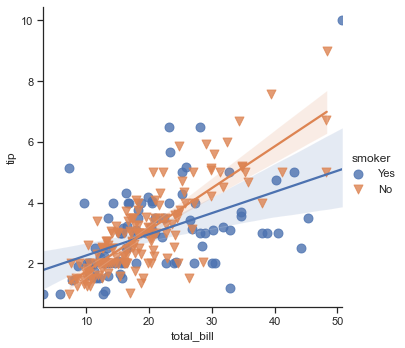

In [303]:
sns.lmplot(x='total_bill',y='tip',data=tips,hue='smoker',markers = ['o','v'],scatter_kws = {'s': 80});
# scatter_kws : used to adjust the size 

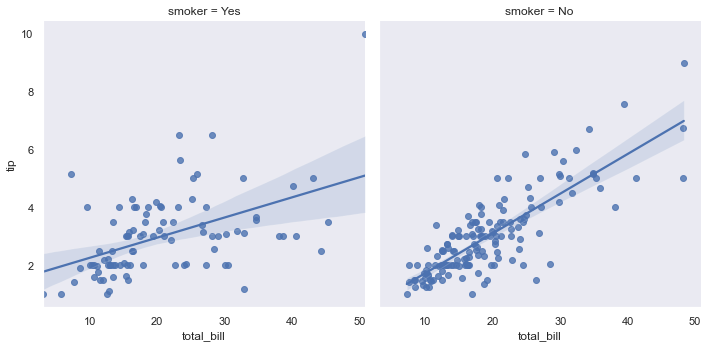

In [230]:
# Differentiating via hue throuh columns rather than color
sns.lmplot(x='total_bill',y='tip',data=tips,col='smoker');

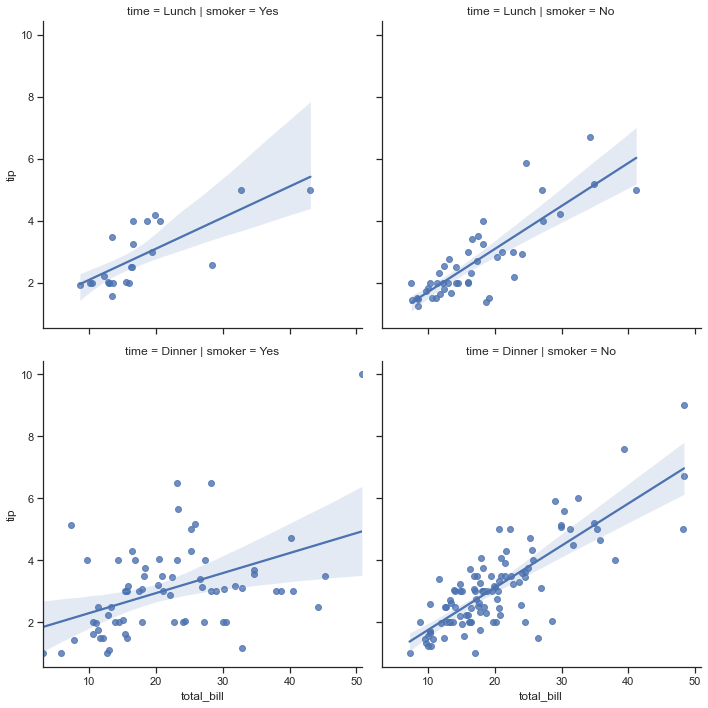

In [304]:
# Differentiating via hue throuh columns & rows rather than color
sns.lmplot(x='total_bill',y='tip',data=tips,col='smoker',row='time');

## Style & Color 

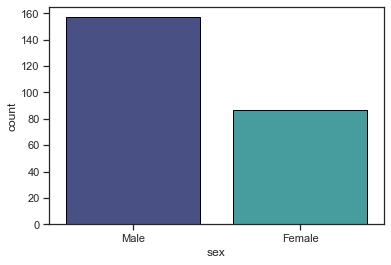

In [235]:
# Setting a style
sns.set_style('ticks')
sns.countplot('sex',data=tips,palette='mako',edgecolor='black');

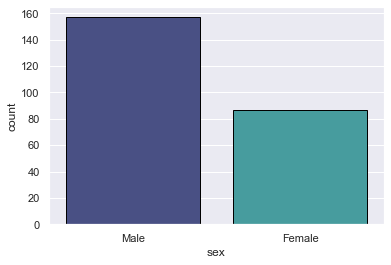

In [298]:
# Setting a diff style
sns.set_style('darkgrid')
sns.countplot('sex',data=tips,palette='mako',edgecolor='black');

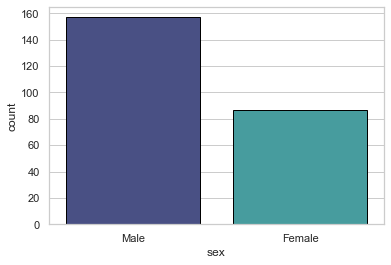

In [299]:
# And another one..
sns.set_style('whitegrid')
sns.countplot('sex',data=tips,palette='mako',edgecolor='black');

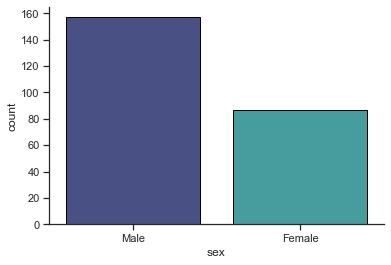

In [300]:
# Removing the ticks partially
sns.set_style('ticks')
sns.countplot('sex',data=tips,palette='mako',edgecolor='black')
sns.despine(top=True,right=True);

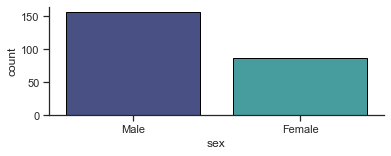

In [301]:
# Changing the figure size using (matplotlib)
plt.figure(figsize=(6,2))
sns.set_style('ticks')
sns.countplot('sex',data=tips,palette='mako',edgecolor='black')
sns.despine(top=True,right=True);

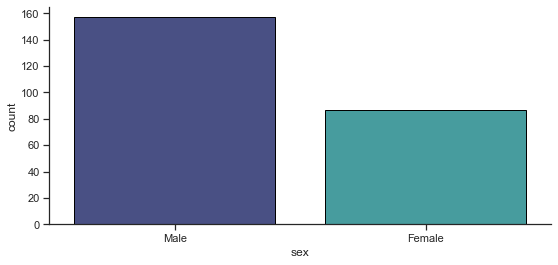

In [302]:
# Setting a context
plt.figure(figsize=(9,4))
sns.set_style('ticks')
sns.countplot('sex',data=tips,palette='mako',edgecolor='black')
sns.despine(top=True,right=True)
sns.set_context('notebook');

## Thank You!